<a href="https://colab.research.google.com/github/sneezedsherry/DataVisualization/blob/master/Time_Series_Plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#1 Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
!pip install seaborn==0.9.0
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [0]:
downloaded = drive.CreateFile({'id':'1s04DN96LISkHZ97e2_1pLbRxglhKx_CZ'}) 
downloaded.GetContentFile('MusicSales2.csv') 

In [0]:
df = pd.read_csv('MusicSales2.csv')

In [0]:
pd.options.display.max_columns = 1000
df.head(1)

,Album,Artist,Bytes,Sales,City,Company,Composer,Country,CustomerID,Email,FirstName,Genre,InvoiceDate,InvoiceID,LastName,MediaType,Milliseconds,Number of Records,Phone,PostalCode,Quantity,Region,State,Track,UnitPrice
0,Balls to the Wall,Accept,5.51M,3.96,Stuttgart,NaN,NaN,Germany,2,leonekohler@surfeu.de,Leonie,Rock,1/1/2008 0:00,1,Kahler,Protected AAC audio file,342562,1,+49 0711 2842222,70174,4,Europe,NaN,Balls to the Wall,0.99


In [0]:
DF = df[(df.Country== 'USA') | (df.Country == 'Canada')].loc[:,('Country','Sales','InvoiceDate')]

DF['InvoiceDate'] = pd.to_datetime(DF['InvoiceDate'])
#MS = DF.sort_values(by=['InvoiceDate'], ascending=True)
MS = DF.groupby(['InvoiceDate','Country'])['Sales'].sum().reset_index()
MS.head()

,InvoiceDate,Country,Sales
0,2008-01-06,Canada,31.68
1,2008-01-11,USA,42.57
2,2008-02-19,USA,3.96
3,2008-03-04,USA,7.92
4,2008-03-05,USA,12.87


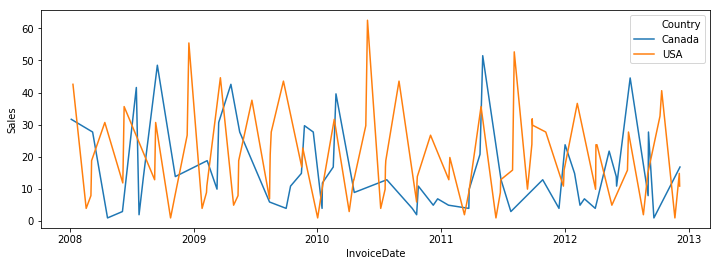

In [0]:
 # At first the ressult says: module 'seaborn' has no attribute 'lineplot',so I check the seaborn version, using "sns.__version__",
 # It shows that my seaborn is 0.7.1, so I have to update it.
 # But the question is when I was doing last Homework, I have already updated seaborn, I couldn't figure out why I have to update it again. 
  
 # Another question is that if I change the formate of datetime using 
 # DF['InvoiceDate'] = pd.to_datetime(DF['InvoiceDate'],format='%m/%d/%Y %H:%M').dt.strftime("%Y/%m/%d")
 # the lineplot seems in disorder. 

fig, ax = plt.subplots(figsize=(12,4))
sns.lineplot(x="InvoiceDate", y="Sales",
             hue="Country",
             data = MS)

##Using Music Sales.csv, explore how Rock music monthly market share fluctuate in US in 2011 and 2012.

In [0]:
DF2 = df[(df.Country == 'USA')].loc[:,('InvoiceDate','Genre','Sales')]
DF2['InvoiceDate'] = pd.to_datetime(DF2['InvoiceDate'])
DF2['InvoiceDate'] = pd.to_datetime(DF2['InvoiceDate'],format='%m/%d/%Y %H:%M').dt.strftime("%Y/%m")
DF2.head()

,InvoiceDate,Genre,Sales
21,2008/01,Metal,0.99
22,2008/01,Alternative & Punk,1.98
23,2008/01,Alternative & Punk,1.98
24,2008/01,Blues,1.98
25,2008/01,Jazz,1.98


In [0]:
mask = (DF2['InvoiceDate'] > '2010/12') & (DF2['InvoiceDate'] < '2013/1')
DF3 = DF2.loc[mask]
DF3.head()

,InvoiceDate,Genre,Sales
1305,2011/01,Rock,0.99
1306,2011/01,Rock,0.99
1307,2011/01,Metal,1.98
1308,2011/01,Rock,1.98
1309,2011/01,Metal,2.97


In [0]:
DF4 = DF3.groupby(['InvoiceDate','Genre'], as_index = False).sum().sort_values(by=['InvoiceDate','Genre'], ascending= True)
DF4.head()

,InvoiceDate,Genre,Sales
0,2011/01,Metal,12.87
1,2011/01,R&B/Soul,8.91
2,2011/01,Rock,10.89
3,2011/03,Metal,10.89
4,2011/04,Latin,5.94


In [0]:
rockSales = DF4[DF4['Genre'] == 'Rock'].drop('Genre', axis = 1)
rockSales

,InvoiceDate,Sales
2,2011/01,10.89
6,2011/04,14.85
9,2011/06,18.81
13,2011/08,12.87
22,2011/11,13.86
26,2011/12,11.88
29,2012/02,23.76
34,2012/04,10.89
39,2012/09,1.98
44,2012/10,39.60


In [0]:
totalSales = DF4.groupby(['InvoiceDate'], as_index = False).sum()

totalSales = pd.merge(totalSales, rockSales, on=['InvoiceDate'], how='left').fillna(0)
totalSales['Share'] = totalSales.Sales_y / totalSales.Sales_x

totalSales

,InvoiceDate,Sales_x,Sales_y,Share
0,2011/01,32.67,10.89,0.333333
1,2011/03,10.89,0.00,0.000000
2,2011/04,35.64,14.85,0.416667
3,2011/06,22.77,18.81,0.826087
4,2011/07,15.87,0.00,0.000000
5,2011/08,52.67,12.87,0.244352
6,2011/09,95.52,0.00,0.000000
7,2011/11,27.72,13.86,0.500000
8,2011/12,39.60,11.88,0.300000
9,2012/02,36.63,23.76,0.648649


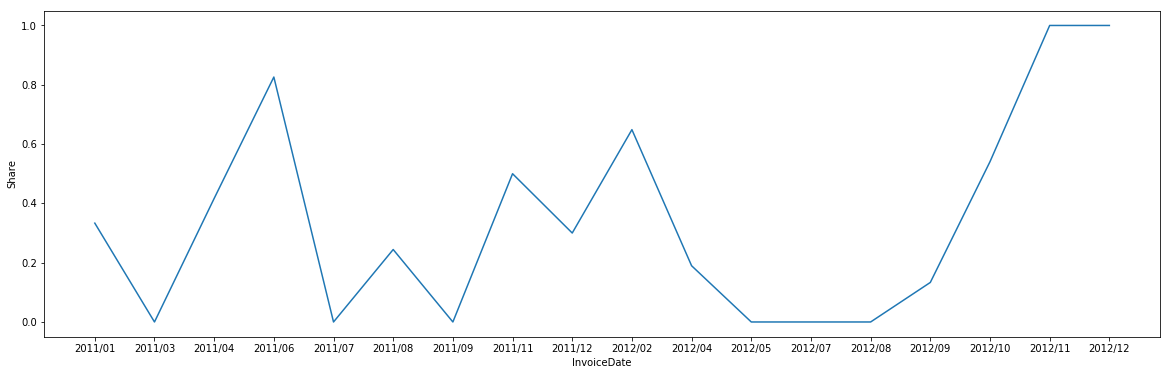

In [0]:
# Here I use lineplot to show the Rock music monthly market share fluctuate

fig, ax = plt.subplots(figsize=(20,6))
#ax.set(xticks=np.arange(0,71,12), xticklabels=[2011, 2012])
# ax.set(yticks=np.arange(12), yticklabels=[0,20,40,60,80,100])
sns.lineplot(x="InvoiceDate", y='Share',
             data = totalSales)